In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import mplsoccer

pd.set_option("display.max_columns", 100)

# Preparation

In [27]:
sb_parser = mplsoccer.Sblocal(dataframe=True)

MATCH_ID = 3869219

In [28]:
TEAM_ID = 778
# 日本代表

PLAYER_ID = 23721
# 遠藤

In [29]:
event_df, related_df, freeze_df, tactics_df = sb_parser.event(path=f"../input/open-data/data/events/{MATCH_ID}.json")

In [30]:
player_event_df = event_df[
    event_df["player_id"]==PLAYER_ID
][["id", "minute", "second", "player_id", "type_name", "x", "y"]].copy()
player_event_df.head()

,id,minute,second,player_id,type_name,x,y
65,21725777-c2f9-4fb5-9bd6-a2d928266391,2,7,23721.0,Ball Receipt,93.8,60.7
66,1dd779c7-d410-4e92-8aae-c096105d52d0,2,7,23721.0,Pass,93.8,60.7
77,189891e4-1cd5-47c7-93f2-939a1571150f,2,29,23721.0,Pressure,87.5,71.2
124,d18061e6-1f33-4c43-a8f8-c33eb584ba93,3,57,23721.0,Pressure,32.0,62.0
204,b35d0c9c-3796-4da7-84b7-067d1421bc12,5,9,23721.0,Pressure,35.5,62.6


In [31]:
player_pass_df = event_df[
    (event_df["player_id"]==PLAYER_ID)&\
    (event_df["type_name"]=="Pass")
][["id", "minute", "second", "player_id", "type_name", "x", "y", "end_x", "end_y"]].copy()
player_pass_df.head()

,id,minute,second,player_id,type_name,x,y,end_x,end_y
66,1dd779c7-d410-4e92-8aae-c096105d52d0,2,7,23721.0,Pass,93.8,60.7,112.6,38.8
294,effada1d-9bfc-477e-a93c-5f5be80f73de,8,6,23721.0,Pass,33.6,47.9,36.8,40.7
302,a707df5e-fdd6-4574-8a1f-c14e73a2958d,8,13,23721.0,Pass,38.5,54.5,57.3,35.4
476,d0af2a6f-9637-41ac-8d41-86fdefd0d11e,11,40,23721.0,Pass,53.7,49.4,66.8,41.6
522,a26499ca-7ebc-49d7-9a2e-de07e5fd7c3e,13,6,23721.0,Pass,42.9,35.0,50.7,17.9


In [32]:
player_complete_pass_df = event_df[
    (event_df["player_id"]==PLAYER_ID)&\
    (event_df["type_name"]=="Pass")&\
    (event_df["outcome_name"].isnull())
][["id", "minute", "second", "player_id", "type_name", "x", "y", "end_x", "end_y", "outcome_name"]].copy()
player_complete_pass_df.head()

,id,minute,second,player_id,type_name,x,y,end_x,end_y,outcome_name
66,1dd779c7-d410-4e92-8aae-c096105d52d0,2,7,23721.0,Pass,93.8,60.7,112.6,38.8,NaN
294,effada1d-9bfc-477e-a93c-5f5be80f73de,8,6,23721.0,Pass,33.6,47.9,36.8,40.7,NaN
302,a707df5e-fdd6-4574-8a1f-c14e73a2958d,8,13,23721.0,Pass,38.5,54.5,57.3,35.4,NaN
476,d0af2a6f-9637-41ac-8d41-86fdefd0d11e,11,40,23721.0,Pass,53.7,49.4,66.8,41.6,NaN
522,a26499ca-7ebc-49d7-9a2e-de07e5fd7c3e,13,6,23721.0,Pass,42.9,35.0,50.7,17.9,NaN


In [33]:
player_incomplete_pass_df = event_df[
    (event_df["player_id"]==PLAYER_ID)&\
    (event_df["type_name"]=="Pass")&\
    (event_df["outcome_name"].notnull())
][["id", "minute", "second", "player_id", "type_name", "x", "y", "end_x", "end_y", "outcome_name"]].copy()
player_incomplete_pass_df.head()

,id,minute,second,player_id,type_name,x,y,end_x,end_y,outcome_name
628,fb081ba0-865e-493e-8f95-e6245e40f088,15,0,23721.0,Pass,19.7,44.9,58.6,74.0,Incomplete
1226,b52749a1-14d4-4f29-ba36-aaa5e9d42e02,31,9,23721.0,Pass,36.5,39.5,47.7,36.4,Incomplete
3662,c22339cd-12b7-4505-96b3-221665d4cde4,98,50,23721.0,Pass,82.8,44.3,82.9,46.2,Incomplete
3697,45122289-198d-4244-b42b-3f24a67ef894,99,29,23721.0,Pass,45.5,26.8,63.8,0.1,Out
3749,85b90c11-7ab6-4c5b-b136-f1d92a526347,102,12,23721.0,Pass,48.7,63.7,83.9,74.2,Incomplete


In [34]:
starting_xi_df = event_df.loc[
    (event_df["type_name"]=="Starting XI")&
    (event_df["team_id"]==TEAM_ID)
][["id", "tactics_formation"]]

starting_xi_df = pd.merge(
    tactics_df,
    starting_xi_df,
    on="id",
    how="inner"
)

starting_xi_df.head()

,jersey_number,match_id,id,player_id,player_name,position_id,position_name,event_tactics_id,tactics_formation
0,12,3869219,c28d2905-359f-4bff-898e-0788e72b8841,25719,Shūichi Gonda,1,Goalkeeper,1,343
1,16,3869219,c28d2905-359f-4bff-898e-0788e72b8841,23730,Takehiro Tomiyasu,3,Right Center Back,2,343
2,22,3869219,c28d2905-359f-4bff-898e-0788e72b8841,3300,Maya Yoshida,4,Center Back,3,343
3,3,3869219,c28d2905-359f-4bff-898e-0788e72b8841,37215,Shogo Taniguchi,5,Left Center Back,4,343
4,14,3869219,c28d2905-359f-4bff-898e-0788e72b8841,23527,Junya Ito,7,Right Wing Back,5,343


# plot

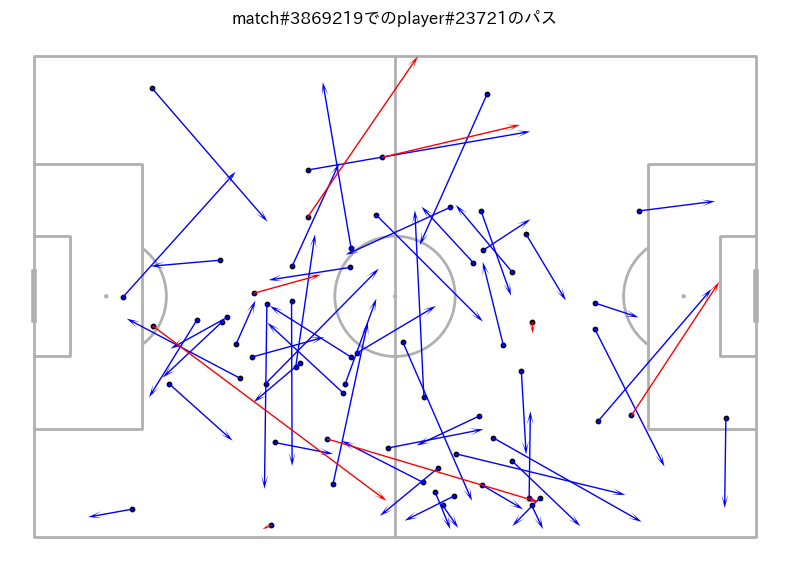

In [35]:
pitch = mplsoccer.Pitch()
fig, ax = pitch.draw(figsize=(8, 6))
scatter = pitch.scatter(
    player_pass_df["x"],
    player_pass_df["y"],
    edgecolor="black",
    color="blue",
    s=10,
    ax=ax
)
complete_arrow = pitch.arrows(
    player_complete_pass_df["x"],
    player_complete_pass_df["y"],
    player_complete_pass_df["end_x"],
    player_complete_pass_df["end_y"],
    width=1,
    headwidth=5,
    headlength=10,
    color="blue",
    ax=ax
)
complete_arrow = pitch.arrows(
    player_incomplete_pass_df["x"],
    player_incomplete_pass_df["y"],
    player_incomplete_pass_df["end_x"],
    player_incomplete_pass_df["end_y"],
    width=1,
    headwidth=5,
    headlength=10,
    color="red",
    ax=ax
)
ax_title = ax.set_title(f"match#{MATCH_ID}でのplayer#{PLAYER_ID}のパス")

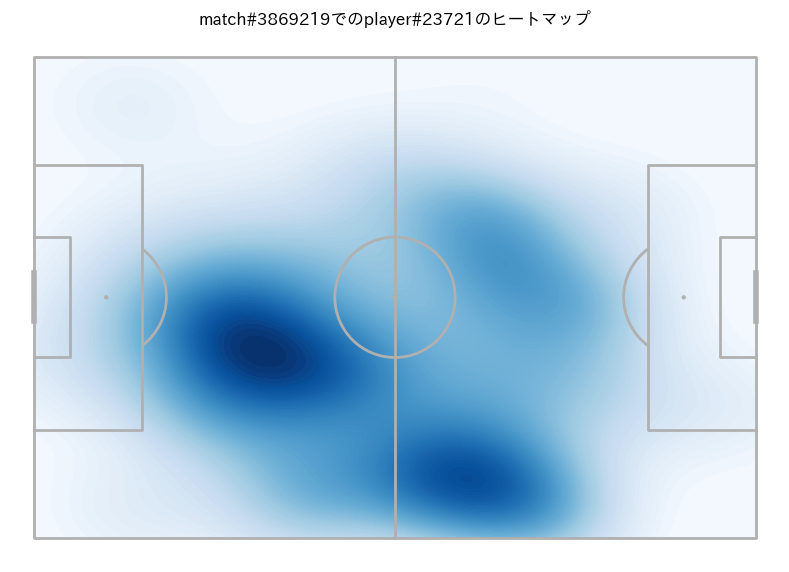

In [36]:
pitch = mplsoccer.Pitch(line_zorder=2)
fig, ax = pitch.draw(figsize=(8, 6))
kdeplot = pitch.kdeplot(
    player_event_df["x"],
    player_event_df["y"],
    ax=ax,
    fill=True,
    levels=100,
    thresh=0,
    cut=4,
    cmap="Blues"
)
ax_title = ax.set_title(f"match#{MATCH_ID}でのplayer#{PLAYER_ID}のヒートマップ")

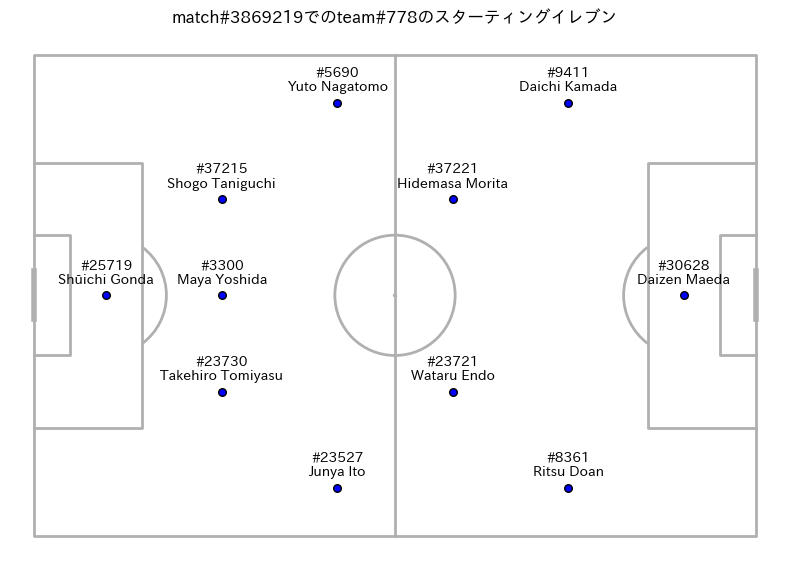

In [37]:
pitch = mplsoccer.Pitch()
fig, ax = pitch.draw(figsize=(8, 6))
formation = pitch.formation(
    starting_xi_df["tactics_formation"].iloc[0],
    positions=starting_xi_df.position_id,
    edgecolor="black",
    color="blue",
    s=30,
    ax=ax
)
formation_txt = pitch.formation(
    starting_xi_df["tactics_formation"].iloc[0],
    positions=starting_xi_df.position_id,
    kind="text",
    text="#"+starting_xi_df["player_id"].astype(str)+"\n"+starting_xi_df["player_name"],
    ha="center",
    yoffset=-2,
    fontsize=10,
    color="black",
    ax=ax
)
ax_title = ax.set_title(f"match#{MATCH_ID}でのteam#{TEAM_ID}のスターティングイレブン")

# TODO

- [mpl soccerのサンプルコード](https://mplsoccer.readthedocs.io/en/latest/gallery/index.html)から使えそうなものをplotする